In [1]:
# update data:
'''
git add data/confirmed-planets.csv
git add data/k2-candidates-table.csv
git add data/last_update_time.txt
git add data/tess-candidates.csv
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import datetime
import os
palette = {'C0': '#228833', 'C1': '#ee6677', 'C2': '#ccbb44', 'C3': '#aa3377',
           'C4': '#4477aa', 'C5': '#66ccee'}
font_path = '/Users/zhanruizhi/Library/Fonts/SimHei.ttf'
root = os.getcwd()
root_prefixed = lambda p: os.path.join(root,p)

In [2]:
# Solar system
solar_planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn',
                        'uranus', 'neptune']
solar_periods = np.array([87.97, 224.70, 365.26, 686.98, 4332.8, 10755.7,
                                 30687, 60190])
solar_radii = np.array([0.383, 0.95, 1.0, 0.53, 10.86, 9.00, 3.97, 3.86])
solar_mass = np.array([0.055, 0.815, 1.0, 0.107, 317.8, 95.159, 14.536,
                              17.147])
solar_zoom = np.array([1, 1, 1, 1, 1, 100. / 57, 1, 1])

In [3]:
# read in all planets
df = pd.read_csv(root_prefixed('data/exoplots_data.csv'))

In [12]:
# find target for proposal
df_confirmed= df.dropna(subset=['rade','period','masse']).query("disposition == 'Confirmed'").query("flag_tran == True").query("rade < 2").query("period < 5").query("insol > 1")
print(df_confirmed)

                  name        hostname  IC disposition    period   rade  \
29          LTT 3780 b        LTT 3780 NaN   Confirmed  0.768379  1.325   
40           TOI-178 b         TOI-178 NaN   Confirmed  1.914558  1.152   
97          TOI-1075 b        TOI-1075 NaN   Confirmed  0.604733  1.791   
103   EPIC 249893012 b  EPIC 249893012 NaN   Confirmed  3.595100  1.950   
121           GJ 357 b          GJ 357 NaN   Confirmed  3.930600  1.200   
...                ...             ...  ..         ...       ...    ...   
4676      Kepler-326 b      Kepler-326 NaN   Confirmed  2.248329  1.520   
4806        Wolf 327 b        Wolf 327 NaN   Confirmed  0.573474  1.240   
4899      HD 93963 A b      HD 93963 A NaN   Confirmed  1.039135  1.350   
5063      Kepler-267 b      Kepler-267 NaN   Confirmed  3.353728  1.980   
5083       Kepler-80 e       Kepler-80 NaN   Confirmed  4.644890  1.600   

      rade_est  rade_err1  rade_err2      radj  ...  st_teff  st_log_lum  \
29         NaN      0.0

In [4]:
# get planet with real radius and period
df_confirmed= df.dropna(subset=['rade','period']).query("disposition == 'Confirmed'")
df_candiates = df.dropna(subset=['rade','period']).query("disposition == 'Candidate'")

2756
3301
3737
4222


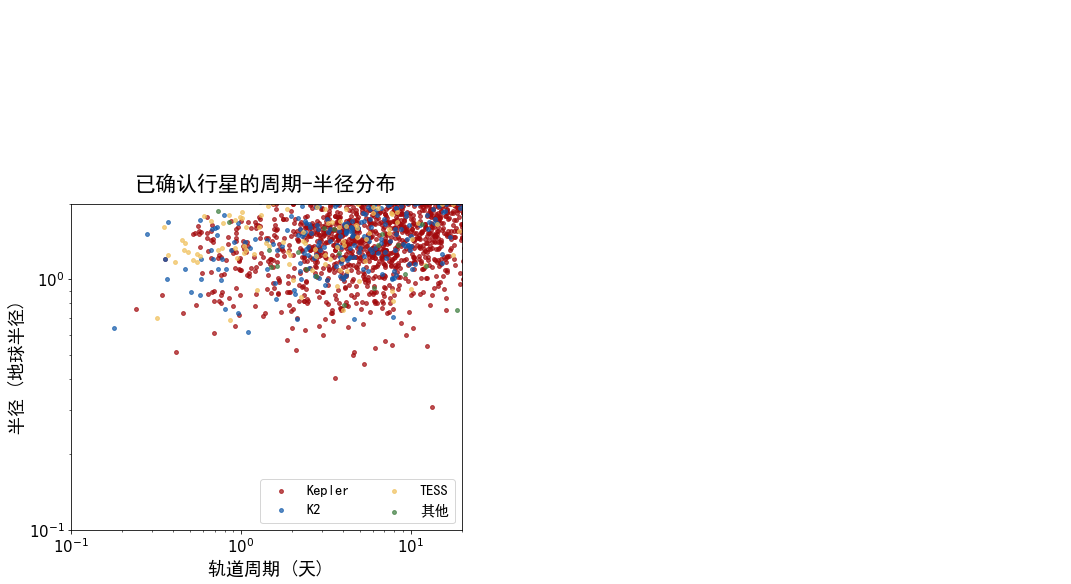

In [6]:
s = 15
a = 0.7
fig, ax = plt.subplots(1,1,figsize=(7,6))
color_list = ['#a2090c','#1159aa','#f0c05a','#3C7C3D']
tot_planet = 0
for color, faculty in zip(color_list, ['Kepler', 'K2', 'TESS']):
    df_faculty = df_confirmed.query(f"facility == @faculty")
    ax.scatter(df_faculty['period'], df_faculty['rade'], label=f'{faculty}',color=color,s=s,alpha=a)
    tot_planet += df_faculty['period'].shape[0]
    print(tot_planet)
    df_faculty = df_candiates.query(f"facility == @faculty")
    #ax.scatter(df_faculty['period'], df_faculty['rade'], color=color,s=s,alpha=a)#, label=f'{faculty}'
# plot the rest of the data not in the faculty list
df_rest = df_confirmed.query(f"facility not in {['Kepler', 'K2', 'TESS']}")
ax.scatter(df_rest['period'], df_rest['rade'], color=color_list[-1], label='其他',s=s,alpha=a)
tot_planet = tot_planet + df_rest['period'].shape[0]
df_rest = df_candiates.query(f"facility not in {['Kepler', 'K2', 'TESS']}")
#ax.scatter(df_rest['period'], df_rest['rade'], color=color_list[-1],s=s,alpha=a)

for planet, period, radius,zoom in zip(solar_planets, solar_periods, solar_radii,solar_zoom):
    img_path = f'icons/{planet}.png'  # 构建图标文件路径
    img = plt.imread(img_path)  # 读取图像文件
    imagebox = OffsetImage(img, zoom=zoom/6)  # 创建OffsetImage对象，调整zoom设置图标大小
    ab = AnnotationBbox(imagebox, (period, radius), frameon=False)  # 创建一个注释框来放置图像
    ax.add_artist(ab)  # 添加到坐标轴
font_prop = FontProperties(fname=font_path,size=14.5)
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.26),ncol=2,prop=font_prop)
font_prop = FontProperties(fname=font_path,size=21)
ax.set_title('已确认行星的周期-半径分布',fontproperties=font_prop,x=0.5,y=1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(0.1,50); ax.set_xlim(1e-1,2e4)
ax.set_xlabel('轨道周期 (天)',fontsize=18,fontproperties=font_prop)
ax.set_ylabel('半径 (地球半径)',fontsize=18,fontproperties=font_prop)
print(tot_planet)
plt.savefig('/Users/zhanruizhi/Documents/pku_files/research/exoplanet_archive/plots/period_radius_faculty.pdf',bbox_inches='tight',dpi=500)

1217


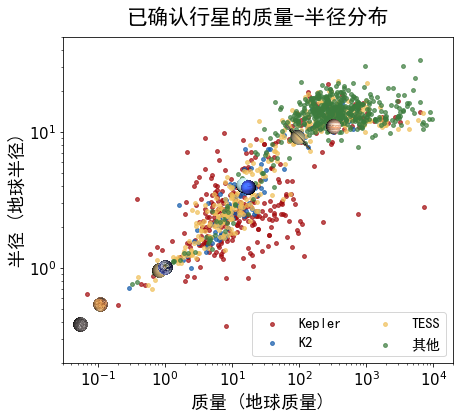

In [10]:
# get planet with real radius and period
df_confirmed= df.dropna(subset=['rade','masse']).query("disposition == 'Confirmed'")
df_candiates = df.dropna(subset=['rade','masse']).query("disposition == 'Candidate'")
tot_planet = 0
s = 15
a = 0.7
fig, ax = plt.subplots(1,1,figsize=(7,6))
color_list = ['#a2090c','#1159aa','#f0c05a','#3C7C3D']
for color, faculty in zip(color_list, ['Kepler', 'K2', 'TESS']):
    df_faculty = df_confirmed.query(f"facility == @faculty")
    ax.scatter(df_faculty['masse'], df_faculty['rade'], label=f'{faculty}',color=color,s=s,alpha=a)
    tot_planet += df_faculty['period'].shape[0]
    df_faculty = df_candiates.query(f"facility == @faculty")
    #ax.scatter(df_faculty['masse'], df_faculty['rade'], color=color,s=s,alpha=a)#, label=f'{faculty}'
# plot the rest of the data not in the faculty list
df_rest = df_confirmed.query(f"facility not in {['Kepler', 'K2', 'TESS']}")
ax.scatter(df_rest['masse'], df_rest['rade'], color=color_list[-1], label='其他',s=s,alpha=a)
tot_planet += df_rest['period'].shape[0]
df_rest = df_candiates.query(f"facility not in {['Kepler', 'K2', 'TESS']}")
#ax.scatter(df_rest['masse'], df_rest['rade'], color=color_list[-1],s=s,alpha=a)
for planet, mass, radius,zoom in zip(solar_planets, solar_mass, solar_radii,solar_zoom):
    img_path = f'icons/{planet}.png'  # 构建图标文件路径
    img = plt.imread(img_path)  # 读取图像文件
    imagebox = OffsetImage(img, zoom=zoom/7)  # 创建OffsetImage对象，调整zoom设置图标大小
    ab = AnnotationBbox(imagebox, (mass, radius), frameon=False)  # 创建一个注释框来放置图像
    ax.add_artist(ab)  # 添加到坐标轴
font_prop = FontProperties(fname=font_path,size=14.5)
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.26),ncol=2,prop=font_prop)
font_prop = FontProperties(fname=font_path,size=21)
ax.set_title('已确认行星的质量-半径分布',fontproperties=font_prop,x=0.5,y=1.02)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_ylim(0.2,50); ax.set_xlim(0.3e-1,2e4)
ax.set_xlabel('质量 (地球质量)',fontsize=18,fontproperties=font_prop)
ax.set_ylabel('半径 (地球半径)',fontsize=18,fontproperties=font_prop)
print(tot_planet)
plt.savefig('/Users/zhanruizhi/Documents/pku_files/research/exoplanet_archive/plots/masse_radius_faculty.pdf',bbox_inches='tight',dpi=500)